#connect to google drive

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#load package from google drive

In [ ]:
#@title
%reload_ext rpy2.ipython

In [ ]:
#@title
%%R
lib_loc <- "/content/drive/MyDrive/Colab_Notebooks/r_lib"
lib_loc

[1] "/content/drive/MyDrive/Colab_Notebooks/r_lib"


In [ ]:
#@title
%%R
library(biomaRt, lib=lib_loc)
library(DOSE, lib=lib_loc)
library(enrichplot, lib=lib_loc)
library(clusterProfiler, lib=lib_loc)
library(cowplot, lib=lib_loc)

R[write to console]: 

R[write to console]: DOSE v3.20.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


R[write to console]: clusterProfiler v4.2.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141

R[write to console]: 
Attaching package: ‘clusterProfiler’


R[write to console]: The following object is masked from ‘package:biomaRt’:

    select


R[write to console]: The following object is masked from ‘package:stats’:

    filter




In [ ]:
#@title
%%R  
library(BiocGenerics, lib=lib_loc) 
library(S4Vectors, lib=lib_loc) #TRanges
library(IRanges, lib=lib_loc) #AnnotationDbi
library(Biobase, lib=lib_loc) 
library(AnnotationDbi, lib=lib_loc)
library(org.Hs.eg.db, lib=lib_loc)

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


R[write to console]: Loading required package: stats4

R[write to console]: 
Attaching package: ‘S4Vectors’


R[write to console]: The following object is masked from ‘package:clusterProfiler’:

    rename


R[write to console]: The following objects are masked from ‘package:base’:

    expand.grid, I, unname


R[write to console]: 
Attaching package: ‘IRanges’


In [ ]:
#@title
%%R
library(ggnewscale, lib=lib_loc)
library(ggupset, lib=lib_loc)
library(ggridges, lib=lib_loc)
library(europepmc, lib=lib_loc)
library(ggplot2)
library(httr)
library(dplyr) 

R[write to console]: 
Attaching package: ‘httr’


R[write to console]: The following object is masked from ‘package:Biobase’:

    content


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:AnnotationDbi’:

    select


R[write to console]: The following object is masked from ‘package:Biobase’:

    combine


R[write to console]: The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


R[write to console]: The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


R[write to console]: The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


R[write to console]: The following object is masked from ‘package:biomaRt’:

    select


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following obje

#選檔案


In [ ]:
import ipywidgets as widgets
from rpy2.robjects import r
import rpy2.robjects as robjects

radiobuttonSpecies = widgets.RadioButtons(
    options= ["mouse", "rat", "human"],
    description='物種:',
    disabled=False
)
def on_radiobuttonSpecies_change(change):
    r.assign("species", change.new)
    #print(change.new)
r.assign("species", "mouse")
display(radiobuttonSpecies)
radiobuttonSpecies.observe(on_radiobuttonSpecies_change, names="value")

RadioButtons(description='物種:', options=('mouse', 'rat', 'human'), value='mouse')

In [ ]:
#上傳檔案到colab
from google.colab import files


!rm * -f #delete all temporary file 

file=files.upload()

if (file):
  filename = next(iter(file))
  r = robjects.r
  r.assign('filename', filename) #將檔案名稱python -> R
else:
  print("請再次執行此儲存格，並選擇一個檔案")

rm: cannot remove 'drive': Is a directory
rm: cannot remove 'sample_data': Is a directory


Saving dep_output.csv to dep_output.csv


#data

In [ ]:
%%R
library(stringr)
fileType <- str_extract_all(filename,'\\b(.txt|.csv)\\b') #確認檔案為csv還是txt
print(fileType)
if (fileType == ".txt") {
    d = read.table(file = filename, header=TRUE ,sep="\t" ,fileEncoding ="UTF-8")
} 
else if (fileType == ".csv")  {
    d = read.csv(file = filename, header=TRUE, fileEncoding ="UTF-8")
}
else {
    print("檔案格式錯誤, 請再選擇一次檔案")
}
print(dim(d))
print(colnames(d))
d[,'ID'] <- sub("-.*", "", d$ID)
#write.csv(d[,'ID'], file="sub.csv")
#print(head(d))

ratioCol <- grep( "ratio$" , colnames(d) )
ratioColname <- colnames(d[ratioCol])
numRatio <- length(ratioCol)
print(numRatio)
cat("ratio: ", ratioColname)

[[1]]
[1] ".csv"

[1] 1333   14
 [1] "name"                   "ID"                     "BCD_vs_ABC_p.val"      
 [4] "CDE_vs_ABC_p.val"       "BCD_vs_ABC_p.adj"       "CDE_vs_ABC_p.adj"      
 [7] "BCD_vs_ABC_significant" "CDE_vs_ABC_significant" "significant"           
[10] "BCD_vs_ABC_ratio"       "CDE_vs_ABC_ratio"       "ABC_centered"          
[13] "BCD_centered"           "CDE_centered"          
[1] 2
ratio:  BCD_vs_ABC_ratio CDE_vs_ABC_ratio

In [ ]:
numRatio_py = robjects.r("numRatio")
ratioColname_py = robjects.r("ratioColname")

radiobuttonRatio = widgets.RadioButtons(
    options= ratioColname_py,
    description='Ratio:',
    disabled=False
)
def on_radiobuttonRatio_change(change):
    r.assign("ratioName", change.new)
    
r.assign("ratioName", ratioColname_py[0])
display(radiobuttonRatio)
radiobuttonRatio.observe(on_radiobuttonRatio_change, names="value")

RadioButtons(description='Ratio:', options=('BCD_vs_ABC_ratio', 'CDE_vs_ABC_ratio'), value='BCD_vs_ABC_ratio')

In [ ]:
%%R 

#連接網頁(uniprot -> entrez)
ID_string <- paste(d$ID, collapse=' ')

#送出資料
library(httr)
result_1 <- httr::POST("https://www.uniprot.org/uploadlists/", body = list('uploadQuery'=ID_string , 'from'="ACC,ID",'to'="P_ENTREZGENEID")) #c("C0HK80 C0HKD9")
print(paste("result: ",result_1[1]))

#得到轉換結果
table_url <- paste0(result_1[1], ".tab")
result <- httr::GET(table_url)
print(paste("result table: ", result[1]))

#把得到的結果轉成table

result_table <- content(result)
uniprot_entrez <- read.table(text=result_table, col.names=c('ID_uniprot', 'GeneID_entrez'))
uniprot_entrez <- uniprot_entrez[-c(1),]

#去除重複 (因為uniprot可能會有多個entrez => 排序後選最小的)
uniprot_entrez[, 2] <- as.numeric(uniprot_entrez[, 2])
uniprot_entrez <- uniprot_entrez [ order(uniprot_entrez$ID_uniprot, uniprot_entrez$GeneID_entrez),]
uniprot_entrez <- uniprot_entrez[!duplicated(uniprot_entrez$ID_uniprot),]

cat("row * colmun =",dim(uniprot_entrez), "\n")
print(head(uniprot_entrez))
#write.table(uniprot_entrez, file="uniprot_entrez.csv", quote=FALSE, row.names=F)
write.csv(uniprot_entrez, file="uniprot_entrez.csv")

[1] "result:  https://www.uniprot.org/mapping/M202202236320BA52A5CE8FCD097CB85A53697A354338D7B"
[1] "result table:  https://www.uniprot.org/mapping/M202202236320BA52A5CE8FCD097CB85A53697A354338D7B.tab"


R[write to console]: No encoding supplied: defaulting to UTF-8.



row * colmun = 1202 2 
    ID_uniprot GeneID_entrez
269 A0A0G2JV04        360658
833     A0JPJ7        296488
539     A0JPM9        691947
914     A1A5S1        366276
637     A2RRU1        690987
873     A4L691        305963


biomaRt


In [ ]:
%%R

if (species != "human") {
    
    rat = useEnsembl("ensembl", dataset = "rnorvegicus_gene_ensembl")
    mouse = useEnsembl("ensembl", dataset = "mmusculus_gene_ensembl")
    human = useEnsembl("ensembl", dataset = "hsapiens_gene_ensembl")

    if (species == "mouse") { 
        #小鼠(entrezid) => 人類(entrez)
        print("species => mouse")
        human_mouse_rat <- getLDS(mart=mouse, attributes=c("entrezgene_id"), filters="entrezgene_id" , values=uniprot_entrez[,"GeneID_entrez"], attributesL= c("entrezgene_id"), martL = human, uniqueRows=T ) #values=uniprots_ID
    }
    else {  
        #大鼠(entrezid) => 人類(entrez)
        print("species => rat")
        human_mouse_rat <- getLDS(mart=rat, attributes=c("entrezgene_id"), filters="entrezgene_id" , values=uniprot_entrez[,"GeneID_entrez"], attributesL= c("entrezgene_id"), martL = human, uniqueRows=T ) #values=uniprots_ID
    }
    print(dim(human_mouse_rat))
}
else {
  print("species => human")
}

R[write to console]: Ensembl site unresponsive, trying uswest mirror

R[write to console]: Ensembl site unresponsive, trying asia mirror



[1] "species => rat"
[1] 1127    2


In [ ]:
%%R
#處理重複 (因為mouse, rat entrez 轉 human entrez 可能為一對多)
if (species != "human") {
  colnames(human_mouse_rat) <- c('GeneID_entrez','human')
  human_mouse_rat <-human_mouse_rat[ order(human_mouse_rat$GeneID_entrez, human_mouse_rat$human),]
  human_mouse_rat <- human_mouse_rat[!duplicated(human_mouse_rat$GeneID_entrez),]

  print(dim(human_mouse_rat))
  print(head(human_mouse_rat))   
}

[1] 1103    2
     GeneID_entrez human
953          24158    34
1053         24159    47
707          24170   118
269          24185   207
285          24189   226
472          24192   231


In [ ]:
%%R 
#inner join d(origin data), human_mouse_rat(GeneID, human), uniprot_entrez(ID_uniprot, GeneID_entrez) 
library(dplyr) 

#temp:entrez(mmu_or_rat)、entrez(human)、ID(uniprot)
if (species != "human") {
  temp <- inner_join( uniprot_entrez, human_mouse_rat, by="GeneID_entrez")
  colnames(temp) <- c('ID', 'GeneID', 'human_entrez')
  temp[, "ID"] <- as.character(temp[, "ID"])
  head(temp)

  #data
  data <- inner_join(temp, d, by="ID")
}
else {
    #human join d, uniprot_entrez
    data <- inner_join(uniprot_entrez, d, by="ID_uniprot")
}
#print(head(data))

cat("uniprot_entrez:",dim(uniprot_entrez), "\n") #(human, mouse, rat)uniprot、entrez
if (species != "human") {
  cat("human_mouse_rat(entrez老鼠_entrez人類):",dim(human_mouse_rat), "\n") #(mouse, rat)entrez、人類entrez
  cat("temp(uniport(老鼠)_entrez(老鼠)_entrez(人類))", dim(temp), "\n")#老鼠uniprot、老鼠entrez、人類entrez
}
cat("data:",dim(data), "\n")

#write.table(uniprot_entrez, file="data.csv", quote=FALSE, row.name=F)
#write.table(human_mouse, file="data.csv", quote=FALSE, row.name=F)
write.table(data, file="dep_output_result.txt", quote=F, row.name=F, sep = "\t")
write.csv(data, file="dep_output_result.csv")

uniprot_entrez: 1202 2 
human_mouse_rat(entrez老鼠_entrez人類): 1103 2 
temp(uniport(老鼠)_entrez(老鼠)_entrez(人類)) 1103 3 
data: 1106 16 


In [ ]:
%%R
#geneList
print(colnames(data))
## feature 1: numeric vector
#geneList = data[,'LA_vs_DMSO_ratio'] #-log(pValue) #要改LA_vs_DMSO_ratio
geneList = data[,ratioName] #-log(pValue)
## feature 2: named vector
names(geneList) = as.character(data[, 'human_entrez']) 

## feature 3: decreasing orde
geneList = sort(geneList, decreasing = TRUE)
head(geneList)


 [1] "ID"                     "GeneID"                 "human_entrez"          
 [4] "name"                   "BCD_vs_ABC_p.val"       "CDE_vs_ABC_p.val"      
 [7] "BCD_vs_ABC_p.adj"       "CDE_vs_ABC_p.adj"       "BCD_vs_ABC_significant"
[10] "CDE_vs_ABC_significant" "significant"            "BCD_vs_ABC_ratio"      
[13] "CDE_vs_ABC_ratio"       "ABC_centered"           "BCD_centered"          
[16] "CDE_centered"          
 4763  5763  9124  2778  7905 79031 
 7.58  7.12  6.31  5.94  5.77  5.54 


In [ ]:
%%R
de <- names(geneList)[abs(log(geneList)) > 1]
edo <- enrichDGN(de)
edo2 <- gseDO(geneList, pvalueCutoff=1)
edox <- setReadable(edo, 'org.Hs.eg.db', 'ENTREZID')

R[write to console]: preparing geneSet collections...

R[write to console]: GSEA analysis...

R[write to console]: leading edge analysis...

R[write to console]: done...



#圖

1.Bar Plot

In [ ]:
%%R
barplot_1 <- function(){
    pic1 <- barplot(edo,x = "Count", color="p.adjust", showCategory=20)+ xlab("Count")
    print(pic1)
    save_plot("pic1.png", pic1, base_height = 10, base_aspect_ratio = 1)
}

2.Dot Plot

In [ ]:
%%R
dotplot_2 <- function(){
   pic2_1 <- dotplot(edo, showCategory=30) + ggtitle("dotplot for ORA")
   pic2_2 <- dotplot(edo2, showCategory=30) + ggtitle("dotplot for GSEA")
   print(pic2_1)
   print(pic2_2)
   save_plot("pic2_1.png", pic2_1, base_height = 10, base_aspect_ratio = 1)
   save_plot("pic2_2.png", pic2_2, base_height = 10, base_aspect_ratio = 1)
}


 3.Gene-Concept Network

In [ ]:
%%R 
gene_concept_network_3 <- function(){
    pic3_1 <- cnetplot(edox, foldChange=geneList)
    ## categorySize can be scaled by 'pvalue' or 'geneNum'
    pic3_2 <- cnetplot(edox, categorySize="pvalue", foldChange=geneList)
    pic3_3 <- cnetplot(edox, foldChange=geneList, circular = TRUE, colorEdge = TRUE)
    print(pic3_1)
    print(pic3_2)
    print(pic3_3)
    pic3_4 <- cnetplot(edox, node_label="category") 
    pic3_5 <- cnetplot(edox, node_label="gene") 
    pic3_6 <- cnetplot(edox, node_label="all") 
    pic3_7 <- cnetplot(edox, node_label="none") 
    print(pic3_4)
    print(pic3_5)
    print(pic3_6)
    print(pic3_7)
    save_plot("pic3_1.png", pic3_1, base_height = 10, base_aspect_ratio = 1)
    save_plot("pic3_2.png", pic3_2, base_height = 10, base_aspect_ratio = 1)
    save_plot("pic3_3.png", pic3_3, base_height = 10, base_aspect_ratio = 1)
    save_plot("pic3_4.png", pic3_4, base_height = 10, base_aspect_ratio = 1)
    save_plot("pic3_5.png", pic3_5, base_height = 10, base_aspect_ratio = 1)
    save_plot("pic3_6.png", pic3_6, base_height = 10, base_aspect_ratio = 1)
    save_plot("pic3_7.png", pic3_7, base_height = 10, base_aspect_ratio = 1)
}

4.Heatmap-like functional classification

In [ ]:
%%R
heatmap_like_functional_classification_4 <- function(){
    pic4_1 <- heatplot(edox)
    pic4_2 <- heatplot(edox, foldChange=geneList)
    cowplot::plot_grid(pic4_1, pic4_2, ncol=1, labels=LETTERS[1:2])
    pic4_1 <- pic4_1 + coord_flip()
    pic4_2 <- pic4_2 + coord_flip()
    print(pic4_1)
    print(pic4_2)
    save_plot("pic4_1.png", pic4_1, base_height = 70, base_aspect_ratio = 0.5,limitsize = FALSE)
    save_plot("pic4_2.png", pic4_2, base_height = 10, base_aspect_ratio = 3,limitsize = FALSE)
}

5 Enrichment Map

In [ ]:
%%R
enrichment_map_5 <- function(){
  edo <- pairwise_termsim(edo)
  pic5_1 <- emapplot(edo)
  pic5_2 <- emapplot(edo, cex_category=1.5)
  pic5_3 <- emapplot(edo, layout="kk")
  pic5_4 <- emapplot(edo, cex_category=1.5,layout="kk") 
  enrichment <- cowplot::plot_grid(pic5_1, pic5_2, pic5_3, pic5_4,labels=LETTERS[1:4])
  print(pic5_1)
  print(pic5_2)
  print(pic5_3)
  print(pic5_4) 
  save_plot("pic5_1.png", pic5_1, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic5_2.png", pic5_2, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic5_3.png", pic5_3, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic5_4.png", pic5_4, base_height = 10, base_aspect_ratio = 1) 
}


6 Biological theme comparison

In [ ]:
%%R
biological_theme_comparison_6 <- function() {
  library(clusterProfiler, lib=lib_loc)
  xx <- compareCluster(data, fun="enrichKEGG",
            organism="hsa", pvalueCutoff=0.05) #pvalueCutoff正常為0.05
  xx <- pairwise_termsim(xx)                     
  pic6_1 <- emapplot(xx)
  pic6_2 <- emapplot(xx, legend_n=2) 
  pic6_3 <- emapplot(xx, pie="count")
  pic6_4 <- emapplot(xx, pie="count", cex_category=1.5, layout="kk")
  #cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])
  print(pic6_1)
  print(pic6_2)
  print(pic6_3)
  print(pic6_4)
  save_plot("pic6_1.png", pic6_1, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic6_2.png", pic6_2, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic6_3.png", pic6_3, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic6_4.png", pic6_4, base_height = 10, base_aspect_ratio = 1)
}


7 UpSet Plot

In [ ]:
%%R
upSet_plot_7_1 <- function() {
    pic7_1 <- upsetplot(edo)

    print(pic7_1)
    save_plot("pic7_1.png", pic7_1, base_height = 10, base_aspect_ratio = 1.5)
}

In [ ]:
%%R
upSet_plot_7_2 <- function(change){
   
    kk2 <- gseKEGG(  geneList = geneList,
              organism     = 'hsa',
              minGSSize    = 120,
              pvalueCutoff = change,
              verbose      = FALSE)
    if (length(kk2[,2]) < 1) {
        print("no term enriched under specific pvalueCutoff")
    }
    else {
      #print(length(kk2))
      pic7_2 <- upsetplot(kk2, n = 10)
      print(pic7_2)
      save_plot("pic7_2.png", pic7_2, base_height = 10, base_aspect_ratio = 1.5) 
    } 
}

In [ ]:
import ipywidgets as widgets
from rpy2.robjects import r
import rpy2.robjects as robjects
from IPython.display import clear_output

def upSet_plot_7_2_py():
  slider = widgets.FloatSlider(
        value=0.05,
        min=0.001,
        max=1,
        step=0.001,
        description='pvalue:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.2',
  )
    #slide.observe(on_slider_change, names="value") 
  def on_slider_change(change):
    clear_output()
    display(slider)
    r.assign("change_new", change.new)
    #print(change.new)
    %R upSet_plot_7_1()
    %R upSet_plot_7_2(change_new)   

  display(slider)
  %R upSet_plot_7_2(0.05)
  slider.observe(on_slider_change, names="value")

8 ridgeline plot for expression distribution of GSEA result (X軸)

In [ ]:
%%R
ridgeline_plot_for_expression_distribution_of_GSEA_result_8 <- function(){
    pic8 <- ridgeplot(edo2) + xlab("expression distributions of enriched genes (log2FC)")
    print(pic8)
    save_plot("pic8.pdf", pic8, base_height = 20, base_aspect_ratio = 0.6)
}

9 running score and preranked list of GSEA result

In [ ]:
%%R
running_score_and_preranked_list_of_GSEA_result_9 <- function(){
  pic9_1 <- gseaplot(edo2, geneSetID = 1, by = "runningScore", title = edo2$Description[1])
  pic9_2 <- gseaplot(edo2, geneSetID = 1, by = "preranked", title = edo2$Description[1])
  pic9_3 <- gseaplot(edo2, geneSetID = 1, title = edo2$Description[1])
  
  #cowplot::plot_grid(pic9_1, pic9_2, pic9_3, ncol=1, labels=LETTERS[1:3])
  pic9_4 <- gseaplot2(edo2, geneSetID = 1, title = edo2$Description[1])
 
  pic9_5 <- gseaplot2(edo2, geneSetID = 1:3)
  pic9_6 <- gseaplot2(edo2, geneSetID = 1:3, pvalue_table = TRUE,
          color = c("#E495A5", "#86B875", "#7DB0DD"), ES_geom = "dot")
  
  pic9_7 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1) + xlab("Rank")
  pic9_8 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1:2) + xlab("Rank")
  #pic9_7_8 <- cowplot::plot_grid(pic9_7, pic9_8, ncol=1, labels=LETTERS[1:2])

  pic9_9 <- gsearank(edo2, 1, title = edo2[1, "Description"])

  pic9_10 <- lapply(1:3, function(i){
    anno <- edo2[i, c("NES", "pvalue", "p.adjust")]
    lab <- paste0(names(anno), "=",  round(anno, 3), collapse="\n")
    gsearank(edo2, i, edo2[i, 2]) + xlab("Rank")+ 
      annotate("text", 5000, edo2[i, "enrichmentScore"]* .75, label =lab, hjust=0, vjust=0)})

#plot_grid(plotlist=pp, ncol=1)
  print(pic9_1)
  print(pic9_2)
  print(pic9_3)
  print(pic9_4)
  print(pic9_5)
  print(pic9_6)
  print(pic9_7)
  print(pic9_8)
  print(pic9_9)
  print(pic9_10)
  save_plot("pic9_1.png", pic9_1, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_2.png", pic9_2, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_3.png", pic9_3, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_4.png", pic9_4, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_5.png", pic9_5, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_6.png", pic9_6, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_7.png", pic9_7, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_8.png", pic9_8, base_height = 10, base_aspect_ratio = 1)
  save_plot("pic9_9.png", pic9_9, base_height = 10, base_aspect_ratio = 1)
  #save_plot("pic9_10.png", pic9_10, base_height = 10, base_aspect_ratio = 1)
  
}

#開始畫圖

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
output = widgets.Output()

@output.capture(clear_output=True,wait=True) # based on https://github.com/jupyter-widgets/ipywidgets/issues/1846 and https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html
def draw(b):
   if (filename):
      
      print ("1. barplot")
      %R barplot_1()
      print ("2. dotplot")
      %R dotplot_2()
      print ("3. Gene-Concept Network")
      %R gene_concept_network_3()
      print ("4. Heatmap-like functional classification")
      %R heatmap_like_functional_classification_4()
      print ("5. Enrichment Map")
      %R enrichment_map_5()
      print ("6. Biological theme comparison")
      %R biological_theme_comparison_6()
      
      print ("8. ridgeline plot for expression distribution of GSEA result")
      %R ridgeline_plot_for_expression_distribution_of_GSEA_result_8()
      print ("9. running score and preranked list of GSEA result")
      %R running_score_and_preranked_list_of_GSEA_result_9()
     #%R print(barplot(edo,x = "Count", color="p.adjust", showCategory=20)+ xlab("Count"))
     
      print("還有一張圖!!!")
   else:
      print("請選擇檔案")
        

        
run_button = widgets.Button(
      description = '開始畫圖'
)

run_button.on_click(draw)
display(run_button)
output

Button(description='開始畫圖', style=ButtonStyle())

Output()

FloatSlider(value=0.495, continuous_update=False, description='pvalue:', max=1.0, min=0.001, readout_format='.…

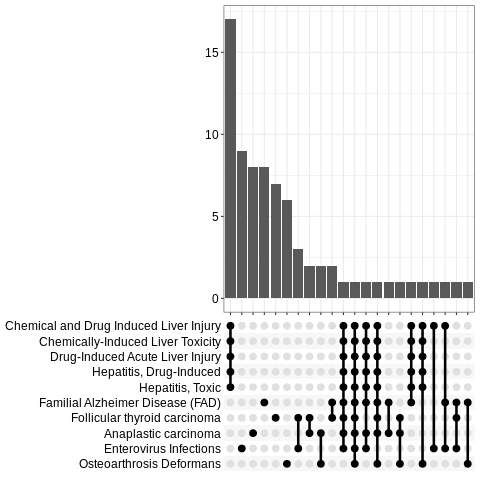

R[write to console]: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

R[write to console]: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

R[write to console]: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

R[write to console]: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



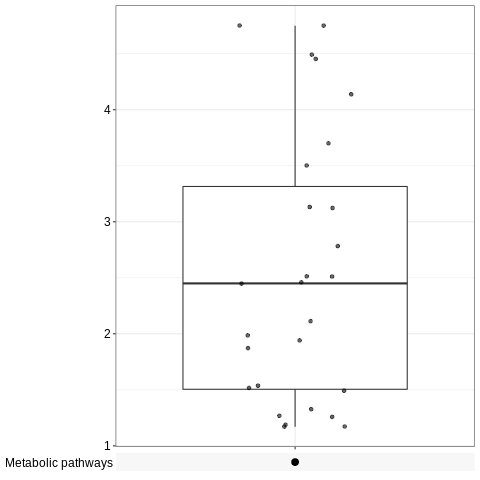

In [ ]:
print ("7. UpSet Plot")
%R upSet_plot_7_1()
upSet_plot_7_2_py()